## Exercise 5

Build a transfer line of 10 m with 4 quads of L=0.4 m (centred at 2, 4, 6, and 8 m).  With K1 respectively of 0.1, 0.1 , 0.1 , 0.1 m$^{−2}$.  Can you find a periodic solution of this lattice? Compute the final optical condition starting from ($\beta_x,~\alpha_x,~\beta_y,~\alpha_y$) = (1 m, 0, 2 m, 0). Match the line to the downstream synchrotron, assume that the injection point of the synchrotron has ($\beta_x,~\alpha_x,~\beta_y,~\alpha_y$) = (2 m, 0, 
1 m, 0). Add 2 horizontal correctors in the transfer line and use MAD-X to compute the 4 terms of the transfer matrix between the corrector kicks and the x-x' position of the beam at the end of the line.  Using this matrix compute the correctors strength needed to have ($\Delta$x= 1 mm, $\Delta$x'= 0).

In [76]:
from cpymad.madx import Madx
import numpy as np
import matplotlib.pyplot as plt
get_ipython().magic('matplotlib inline')
%config InlineBackend.figure_format = 'retina' # retina display
import matplotlib.patches as patches

def plotLatticeSeries(ax,series, height=1., v_offset=0., color='r',alpha=0.5,lw=3):
    aux=series
    ax.add_patch(
    patches.Rectangle(
        (aux.s-aux.l, v_offset-height/2.),   # (x,y)
        aux.l,          # width
        height,          # height
        color=color, alpha=alpha,lw=lw
    )
    )
    return;

In [107]:
madx=Madx()
madx.input('''
TITLE, ’CAS2019 Fifth  Exercise’; 

quadrupoleLength=0.1;
cellLength=10;



myk1=.1;// m^-2
myk2=.1;// m^-2
myk3=.1;// m^-2
myk4=.1;// m^-2

Q: quadrupole, L=quadrupoleLength;
hkicker1: hkicker, kick:=theta1;
hkicker2: hkicker, kick:=theta2;

cas5:sequence, refer=center, L=cellLength;
q1: Q, K1:=myk1, at=2;
myCorrector1: hkicker1, at=2.4;
q2: Q, K1:=myk2, at=4;
q3: Q, K1:=myk3, at=6;
myCorrector2: hkicker2, at=6.4;
q4: Q, K1:=myk4, at=8;
endsequence;

beam, particle=proton, energy=2;
select,flag=interpolate, class=drift, slice=10, range=#s/#e;
select,flag=interpolate, class=quadrupole, slice=5, range=#s/#e;

use, sequence=cas5;
twiss;
''');



  ++++++++++++++++++++++++++++++++++++++++++++
  +     MAD-X 5.05.00  (64 bit, Linux)       +
  + Support: mad@cern.ch, http://cern.ch/mad +
  + Release   date: 2019.05.10               +
  + Execution date: 2019.06.15 16:19:13      +
  ++++++++++++++++++++++++++++++++++++++++++++
enter Twiss module
++++++ warning: Twiss failed:  MAD-X continues


In [108]:
madx.table.twiss.dframe()

,name,keyword,s,betx,alfx,mux,bety,alfy,muy,x,...,sig54,sig55,sig56,sig61,sig62,sig63,sig64,sig65,sig66,n1


There is not a periodic solution!

In [109]:
madx.input('''
use, sequence=cas5;
savebeta, label=betaEnd, place=#e;
twiss,betx=1, bety=2;
''')

enter Twiss module

++++++ table: summ

            length             orbit5               alfa            gammatr 
                10                 -0                  0                  0 

                q1                dq1            betxmax              dxmax 
       0.236117848                  0        85.59952509                  0 

             dxrms             xcomax             xcorms                 q2 
                 0                  0                  0       0.2150800354 

               dq2            betymax              dymax              dyrms 
                 0        61.41336649                  0                  0 

            ycomax             ycorms             deltap            synch_1 
                 0                  0                  0                  0 

           synch_2            synch_3            synch_4            synch_5 
                 0                  0                  0                  0 

            nflips 
          

True

(-5, 150)

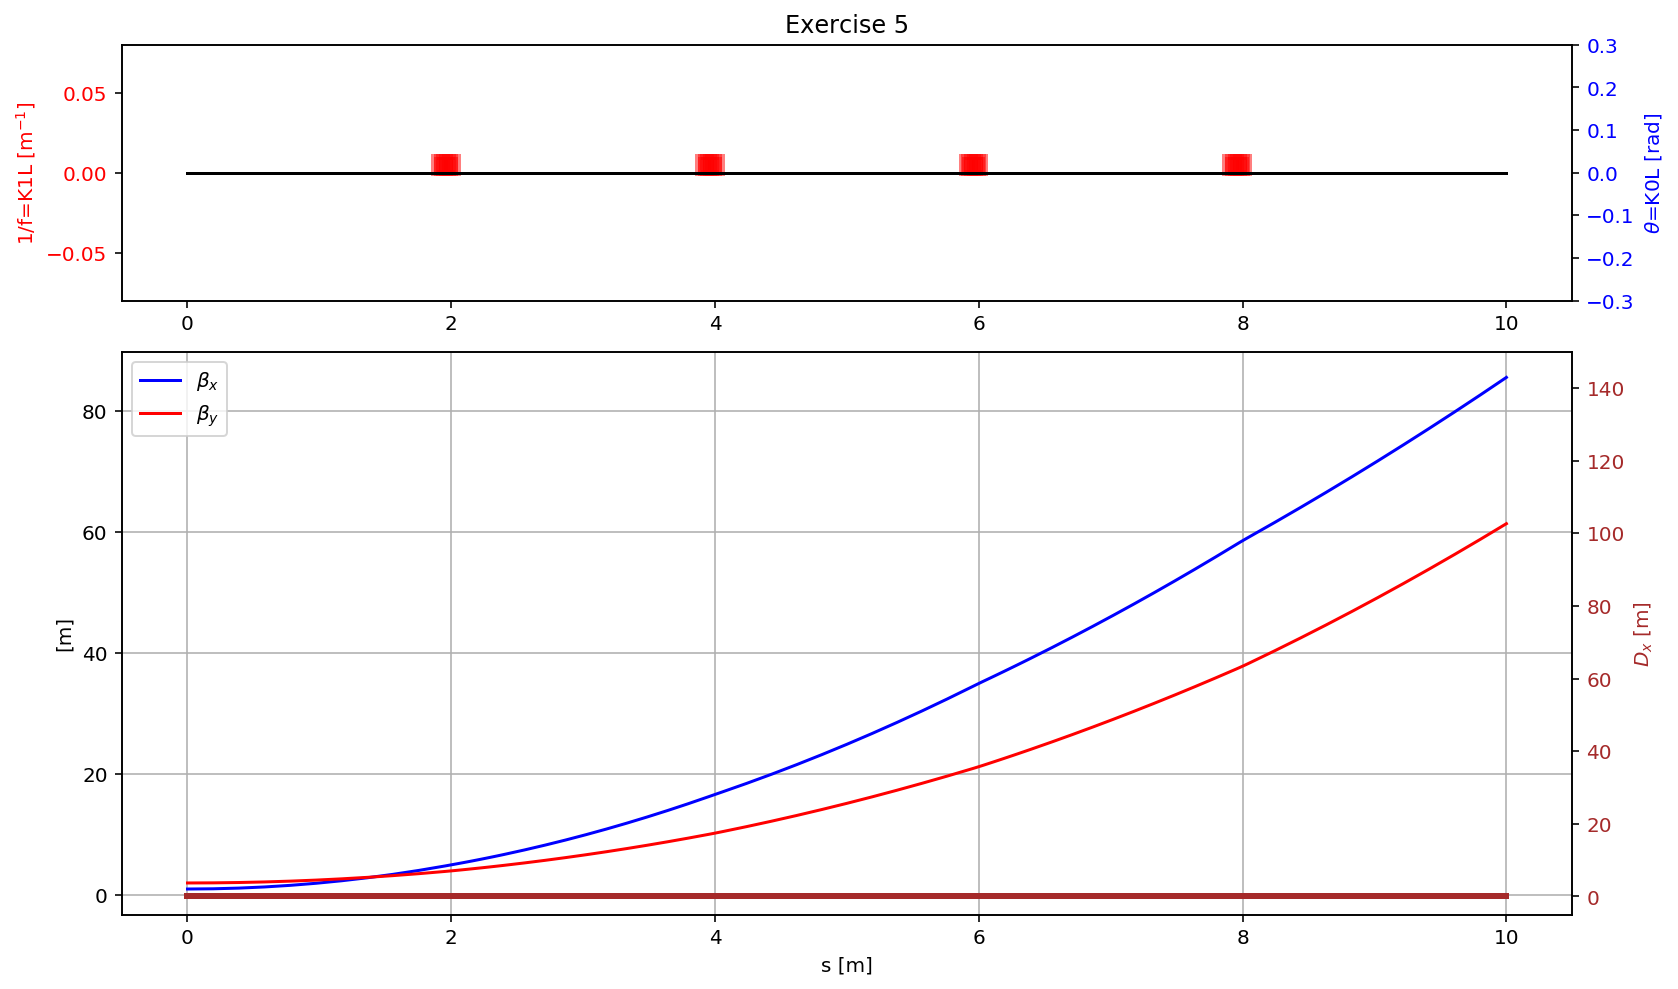

In [110]:
myTwiss=madx.table.twiss.dframe()
myTwissRef=madx.table.twiss.dframe()

fig = plt.figure(figsize=(13,8))
# set up subplot grid
#gridspec.GridSpec(3,3)

ax1=plt.subplot2grid((3,3), (0,0), colspan=3, rowspan=1)
plt.plot(myTwiss['s'],0*myTwiss['s'],'k')


DF=myTwiss[(myTwiss['keyword']=='quadrupole')]
for i in range(len(DF)):
    aux=DF.iloc[i]
    plotLatticeSeries(plt.gca(),aux, height=aux.k1l, v_offset=aux.k1l/2, color='r')
    
DF=myTwiss[(myTwiss['keyword']=='multipole')]
for i in range(len(DF)):
    aux=DF.iloc[i]
    plotLatticeSeries(plt.gca(),aux, height=aux.k1l, v_offset=aux.k1l/2, color='r')

    
color = 'red'
ax1.set_ylabel('1/f=K1L [m$^{-1}$]', color=color)  # we already handled the x-label with ax1
ax1.tick_params(axis='y', labelcolor=color)
plt.ylim(-.08,.08)
plt.title('Exercise 5')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'blue'
ax2.set_ylabel('$\\theta$=K0L [rad]', color=color)  # we already handled the x-label with ax1
ax2.tick_params(axis='y', labelcolor=color)


#DF=myTwiss[(myTwiss['keyword']=='sbend')]
#for i in range(len(DF)):
#    aux=DF.iloc[i]
#    plotLatticeSeries(ax2,aux, height=aux.angle*1000, v_offset=aux.angle*1000/2, color='b')

DF=myTwiss[(myTwiss['keyword']=='multipole')]
for i in range(len(DF)):
    aux=DF.iloc[i]
    plotLatticeSeries(plt.gca(),aux, height=aux.k0l, v_offset=aux.k0l/2, color='b')

plt.ylim(-.3,.3)

# large subplot
plt.subplot2grid((3,3), (1,0), colspan=3, rowspan=2,sharex=ax1)

plt.plot(myTwiss['s'],myTwiss['betx'],'b', label='$\\beta_x$')
plt.plot(myTwiss['s'],myTwiss['bety'],'r', label='$\\beta_y$')
plt.legend(loc='best')
plt.ylabel('[m]')
plt.xlabel('s [m]')
plt.grid()

ax3 = plt.gca().twinx()   # instantiate a second axes that shares the same x-axis
plt.plot(myTwiss['s'],myTwiss['dx'],'brown', label='$D_x$', lw=3)
ax3.set_ylabel('$D_x$ [m]', color='brown')  # we already handled the x-label with ax1
ax3.tick_params(axis='y', labelcolor='brown')
plt.ylim(-5, 150)

In [111]:
# this is the savebeta point
madx.value('betaEnd->betx');
madx.value('betaEnd->bety');
madx.value('betaEnd->alfx');
madx.value('betaEnd->alfy');

betaend->betx      =        85.59952509 ;
betaend->bety      =        61.41336649 ;
betaend->alfx      =       -7.397890988 ;
betaend->alfy      =        -6.62454697 ;


In [112]:
madx.input('''
MATCH, SEQUENCE=cas5, betx=1, bety=2;
constraint, betx=2, range=#e;
constraint, alfx=0, range=#e;
constraint, bety=1, range=#e;
constraint, alfy=0, range=#e;
VARY, NAME= myk1, STEP=0.00001;
VARY, NAME= myk2, STEP=0.00001;
VARY, NAME= myk3, STEP=0.00001;
VARY, NAME= myk4, STEP=0.00001;
JACOBIAN, CALLS=50, TOLERANCE=1e-20;//method adopted
ENDMATCH;
twiss,betx=1, bety=2;
''')

START MATCHING

number of sequences: 1
sequence name: cas5
entry name: betx
number of entries: 1
entry value: 1.000000
entry name: bety
number of entries: 1
entry value: 2.000000
number of variables:    4
user given constraints: 1
total constraints:      4

START JACOBIAN:


MATCH SUMMARY

Node_Name                  Constraint   Type  Target Value       Final Value        Penalty
--------------------------------------------------------------------------------------------------


Final Penalty Function =   3.12178251e-24





Variable                 Final Value  Initial Value Lower Limit  Upper Limit 
--------------------------------------------------------------------------------
myk1                     -6.76969e-01  1.00000e-01 -1.00000e+20  1.00000e+20
myk2                      6.54514e+00  1.00000e-01 -1.00000e+20  1.00000e+20
myk3                     -6.80251e+00  1.00000e-01 -1.00000e+20  1.00000e+20
myk4                      8.24398e+00  1.00000e-01 -1.00000e+20  1.00000e+20

E

True

(-5, 150)

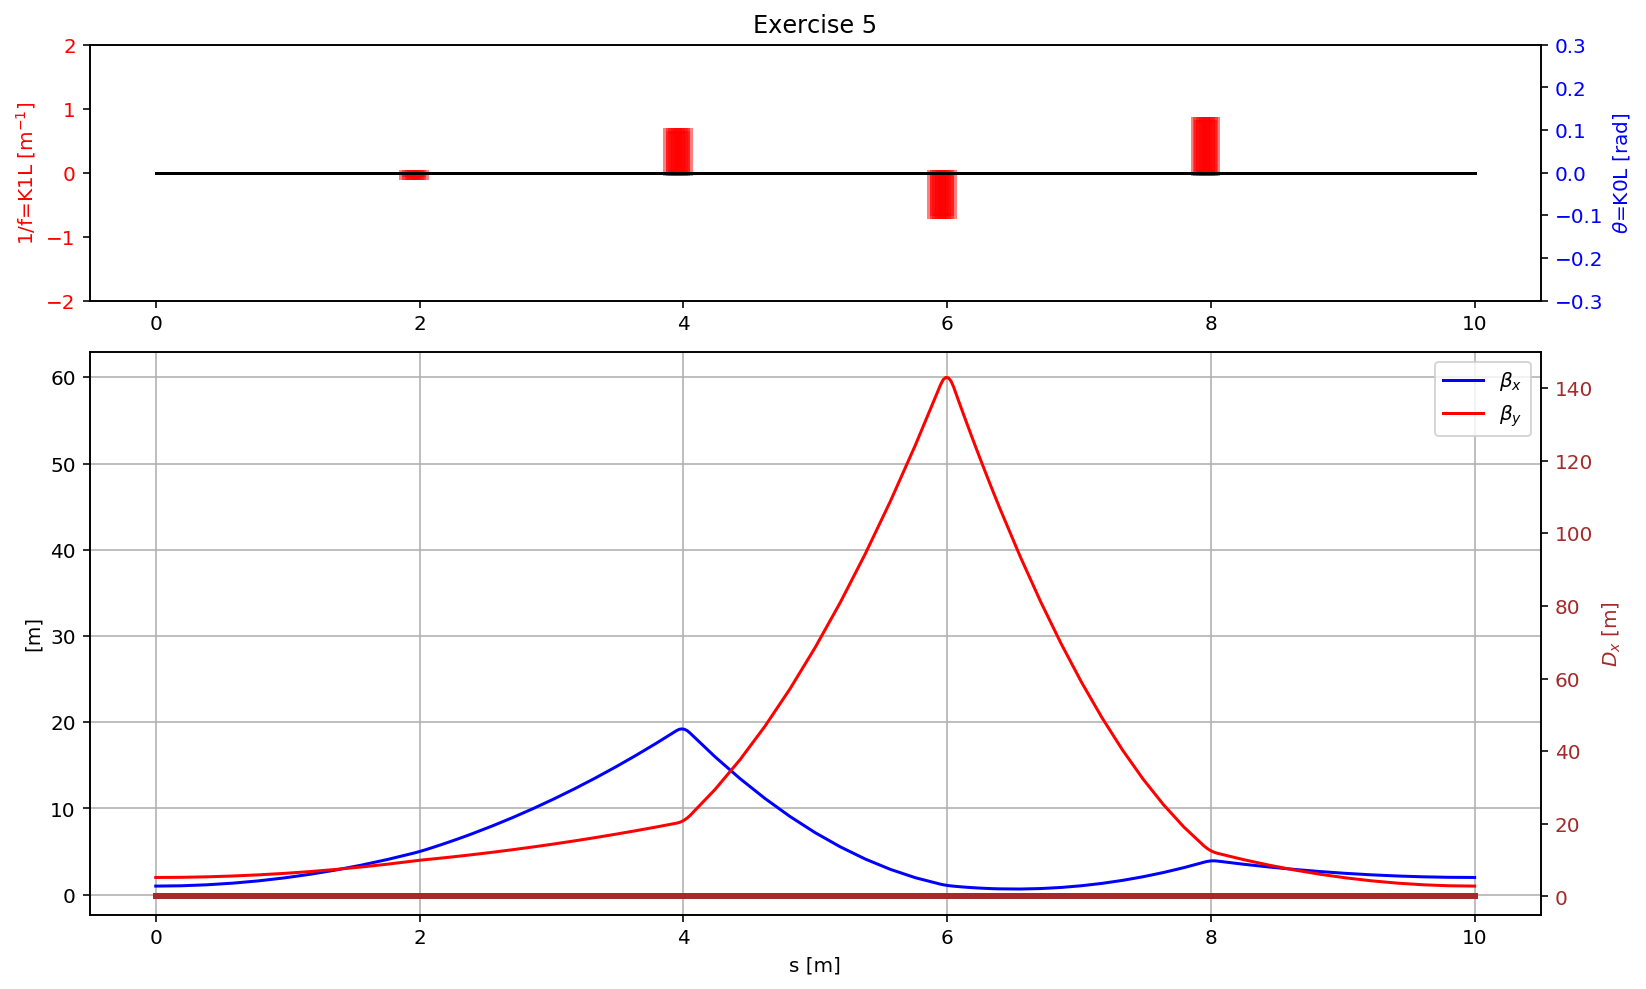

In [113]:
myTwiss=madx.table.twiss.dframe()
fig = plt.figure(figsize=(13,8))
# set up subplot grid
#gridspec.GridSpec(3,3)

ax1=plt.subplot2grid((3,3), (0,0), colspan=3, rowspan=1)
plt.plot(myTwiss['s'],0*myTwiss['s'],'k')


DF=myTwiss[(myTwiss['keyword']=='quadrupole')]
for i in range(len(DF)):
    aux=DF.iloc[i]
    plotLatticeSeries(plt.gca(),aux, height=aux.k1l, v_offset=aux.k1l/2, color='r')
    
DF=myTwiss[(myTwiss['keyword']=='multipole')]
for i in range(len(DF)):
    aux=DF.iloc[i]
    plotLatticeSeries(plt.gca(),aux, height=aux.k1l, v_offset=aux.k1l/2, color='r')

    
color = 'red'
ax1.set_ylabel('1/f=K1L [m$^{-1}$]', color=color)  # we already handled the x-label with ax1
ax1.tick_params(axis='y', labelcolor=color)
plt.ylim(-2,2)
plt.title('Exercise 5')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'blue'
ax2.set_ylabel('$\\theta$=K0L [rad]', color=color)  # we already handled the x-label with ax1
ax2.tick_params(axis='y', labelcolor=color)


#DF=myTwiss[(myTwiss['keyword']=='sbend')]
#for i in range(len(DF)):
#    aux=DF.iloc[i]
#    plotLatticeSeries(ax2,aux, height=aux.angle*1000, v_offset=aux.angle*1000/2, color='b')

DF=myTwiss[(myTwiss['keyword']=='multipole')]
for i in range(len(DF)):
    aux=DF.iloc[i]
    plotLatticeSeries(plt.gca(),aux, height=aux.k0l, v_offset=aux.k0l/2, color='b')

plt.ylim(-.3,.3)

# large subplot
plt.subplot2grid((3,3), (1,0), colspan=3, rowspan=2,sharex=ax1)

plt.plot(myTwiss['s'],myTwiss['betx'],'b', label='$\\beta_x$')
plt.plot(myTwiss['s'],myTwiss['bety'],'r', label='$\\beta_y$')
plt.legend(loc='best')
plt.ylabel('[m]')
plt.xlabel('s [m]')
plt.grid()

ax3 = plt.gca().twinx()   # instantiate a second axes that shares the same x-axis
plt.plot(myTwiss['s'],myTwiss['dx'],'brown', label='$D_x$', lw=3)
ax3.set_ylabel('$D_x$ [m]', color='brown')  # we already handled the x-label with ax1
ax3.tick_params(axis='y', labelcolor='brown')
plt.ylim(-5, 150)

In [114]:
madx.input('''
MATCH, SEQUENCE=cas5, betx=1, bety=2;
constraint, betx=betaEnd->betx, range=#e;
constraint, alfx=betaEnd->alfx, range=#e;
constraint, bety=betaEnd->bety, range=#e;
constraint, alfy=betaEnd->alfy, range=#e;
VARY, NAME= myk1, STEP=0.00001;
VARY, NAME= myk2, STEP=0.00001;
VARY, NAME= myk3, STEP=0.00001;
VARY, NAME= myk4, STEP=0.00001;
JACOBIAN, CALLS=50, TOLERANCE=1e-20;//method adopted
ENDMATCH;

twiss,betx=1, bety=2;
''')

START MATCHING

number of sequences: 1
sequence name: cas5
entry name: betx
number of entries: 1
entry value: 1.000000
entry name: bety
number of entries: 1
entry value: 2.000000
number of variables:    4
user given constraints: 1
total constraints:      4

START JACOBIAN:

  
iteration:   1 error:   0.000000E+00 deltap:   0.000000E+00
orbit:   0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00
++++++ warning: TWCPIN:  Mode 2 is unstable for delta(p)/p =     0.000000: cosmux =     0.805975, cosmuy =     1.206091                                                        
  
open line - error with deltap:   0.000000E+00
initial orbit vector:   0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00
final orbit vector:     0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00
 JACOBIAN Strategy =           3
Initial Penalty Function =   0.2049999680949820E+05


 Solve system with            4 con,        

True

(-5, 150)

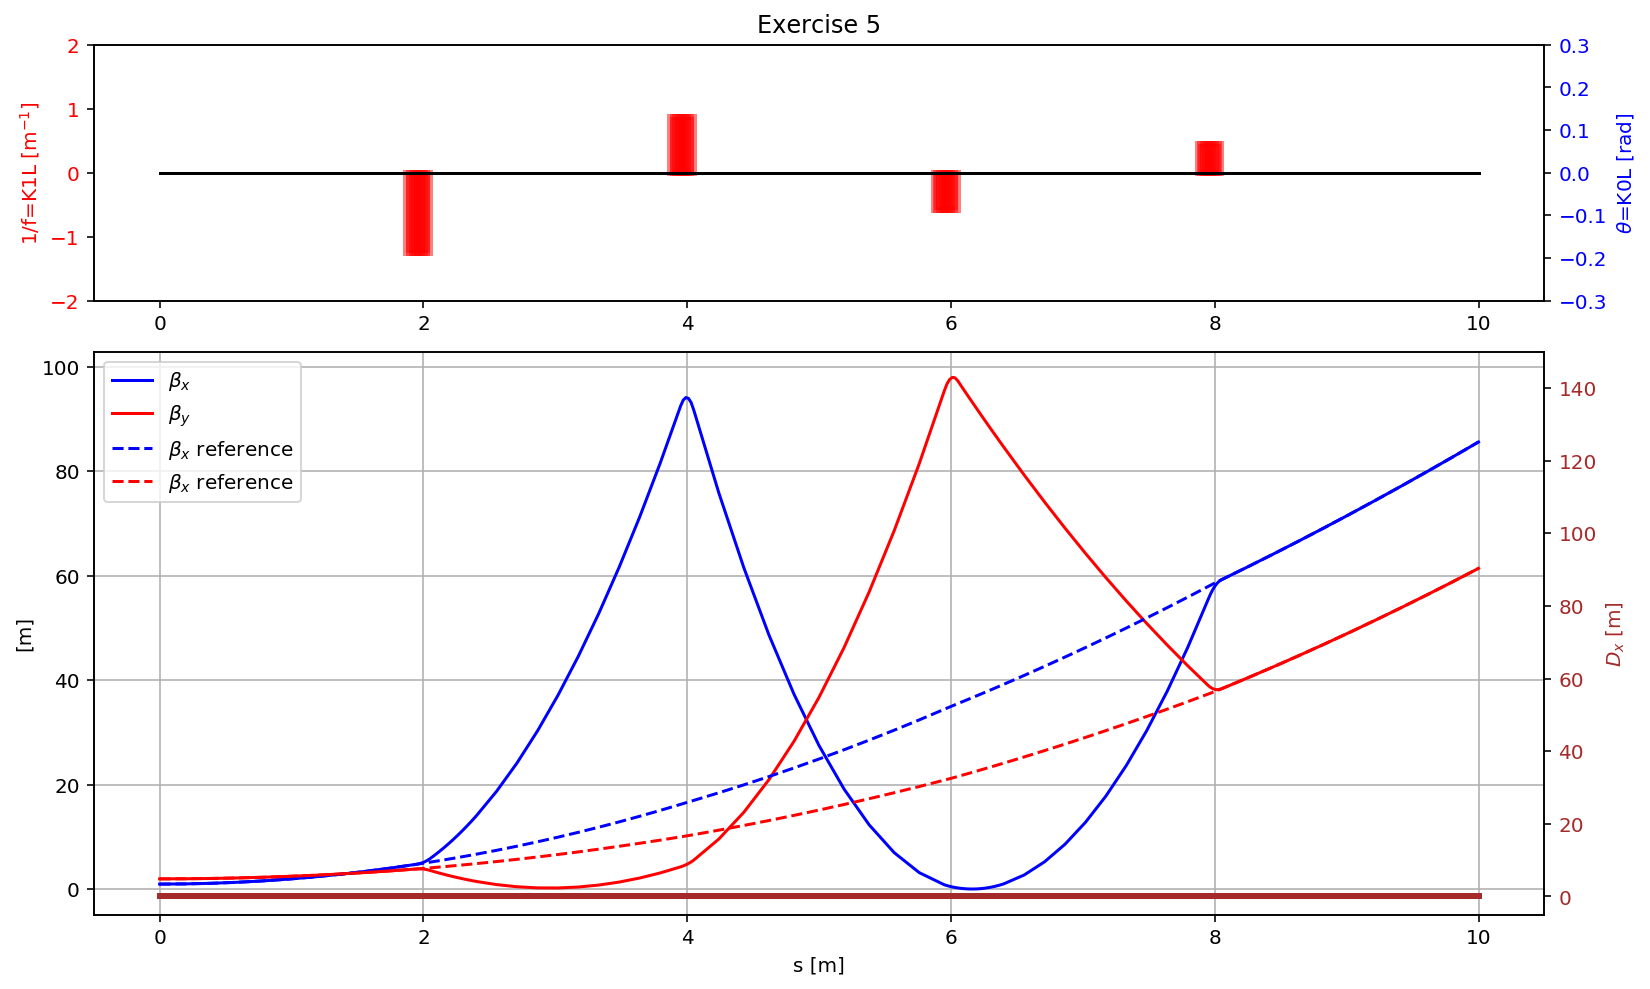

In [115]:
myTwiss=madx.table.twiss.dframe()
fig = plt.figure(figsize=(13,8))
# set up subplot grid
#gridspec.GridSpec(3,3)

ax1=plt.subplot2grid((3,3), (0,0), colspan=3, rowspan=1)
plt.plot(myTwiss['s'],0*myTwiss['s'],'k')


DF=myTwiss[(myTwiss['keyword']=='quadrupole')]
for i in range(len(DF)):
    aux=DF.iloc[i]
    plotLatticeSeries(plt.gca(),aux, height=aux.k1l, v_offset=aux.k1l/2, color='r')
    
DF=myTwiss[(myTwiss['keyword']=='multipole')]
for i in range(len(DF)):
    aux=DF.iloc[i]
    plotLatticeSeries(plt.gca(),aux, height=aux.k1l, v_offset=aux.k1l/2, color='r')

    
color = 'red'
ax1.set_ylabel('1/f=K1L [m$^{-1}$]', color=color)  # we already handled the x-label with ax1
ax1.tick_params(axis='y', labelcolor=color)
plt.ylim(-2,2)
plt.title('Exercise 5')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'blue'
ax2.set_ylabel('$\\theta$=K0L [rad]', color=color)  # we already handled the x-label with ax1
ax2.tick_params(axis='y', labelcolor=color)


#DF=myTwiss[(myTwiss['keyword']=='sbend')]
#for i in range(len(DF)):
#    aux=DF.iloc[i]
#    plotLatticeSeries(ax2,aux, height=aux.angle*1000, v_offset=aux.angle*1000/2, color='b')

DF=myTwiss[(myTwiss['keyword']=='multipole')]
for i in range(len(DF)):
    aux=DF.iloc[i]
    plotLatticeSeries(plt.gca(),aux, height=aux.k0l, v_offset=aux.k0l/2, color='b')

plt.ylim(-.3,.3)

# large subplot
plt.subplot2grid((3,3), (1,0), colspan=3, rowspan=2,sharex=ax1)

plt.plot(myTwiss['s'],myTwiss['betx'],'b', label='$\\beta_x$')
plt.plot(myTwiss['s'],myTwiss['bety'],'r', label='$\\beta_y$')

plt.plot(myTwissRef['s'],myTwissRef['betx'],'--b', label='$\\beta_x$ reference')
plt.plot(myTwissRef['s'],myTwissRef['bety'],'--r', label='$\\beta_x$ reference')
plt.legend(loc='best')
plt.ylabel('[m]')
plt.xlabel('s [m]')
plt.grid()

ax3 = plt.gca().twinx()   # instantiate a second axes that shares the same x-axis
plt.plot(myTwiss['s'],myTwiss['dx'],'brown', label='$D_x$', lw=3)
ax3.set_ylabel('$D_x$ [m]', color='brown')  # we already handled the x-label with ax1
ax3.tick_params(axis='y', labelcolor='brown')
plt.ylim(-5, 150)

**Important observation**: you did not find back the initial configuration! The solution is not unique, and the one just found is not optimal! The conclusions is not to use blindly the matching, you need to suggest a good starting point

In [118]:
madx.input('''
myk1=.05;
myk2=.05;
myk3=.05;
myk4=.05;

MATCH, SEQUENCE=cas5, betx=1, bety=2;
constraint, betx=betaEnd->betx, range=#e;
constraint, alfx=betaEnd->alfx, range=#e;
constraint, bety=betaEnd->bety, range=#e;
constraint, alfy=betaEnd->alfy, range=#e;
VARY, NAME= myk1, STEP=0.00001;
VARY, NAME= myk2, STEP=0.00001;
VARY, NAME= myk3, STEP=0.00001;
VARY, NAME= myk4, STEP=0.00001;
JACOBIAN, CALLS=50, TOLERANCE=1e-20;//method adopted
ENDMATCH;

twiss,betx=1, bety=2;
''')

++++++ info: myk1 redefined
++++++ info: myk2 redefined
++++++ info: myk3 redefined
++++++ info: myk4 redefined
START MATCHING

number of sequences: 1
sequence name: cas5
entry name: betx
number of entries: 1
entry value: 1.000000
entry name: bety
number of entries: 1
entry value: 2.000000
number of variables:    4
user given constraints: 1
total constraints:      4

START JACOBIAN:


MATCH SUMMARY

Node_Name                  Constraint   Type  Target Value       Final Value        Penalty
--------------------------------------------------------------------------------------------------


Final Penalty Function =   5.17492754e-28





Variable                 Final Value  Initial Value Lower Limit  Upper Limit 
--------------------------------------------------------------------------------
myk1                      1.30949e-01  5.00000e-02 -1.00000e+20  1.00000e+20
myk2                      2.12741e-01  5.00000e-02 -1.00000e+20  1.00000e+20
myk3                     -8.80669e-02  5.000

True

(-5, 150)

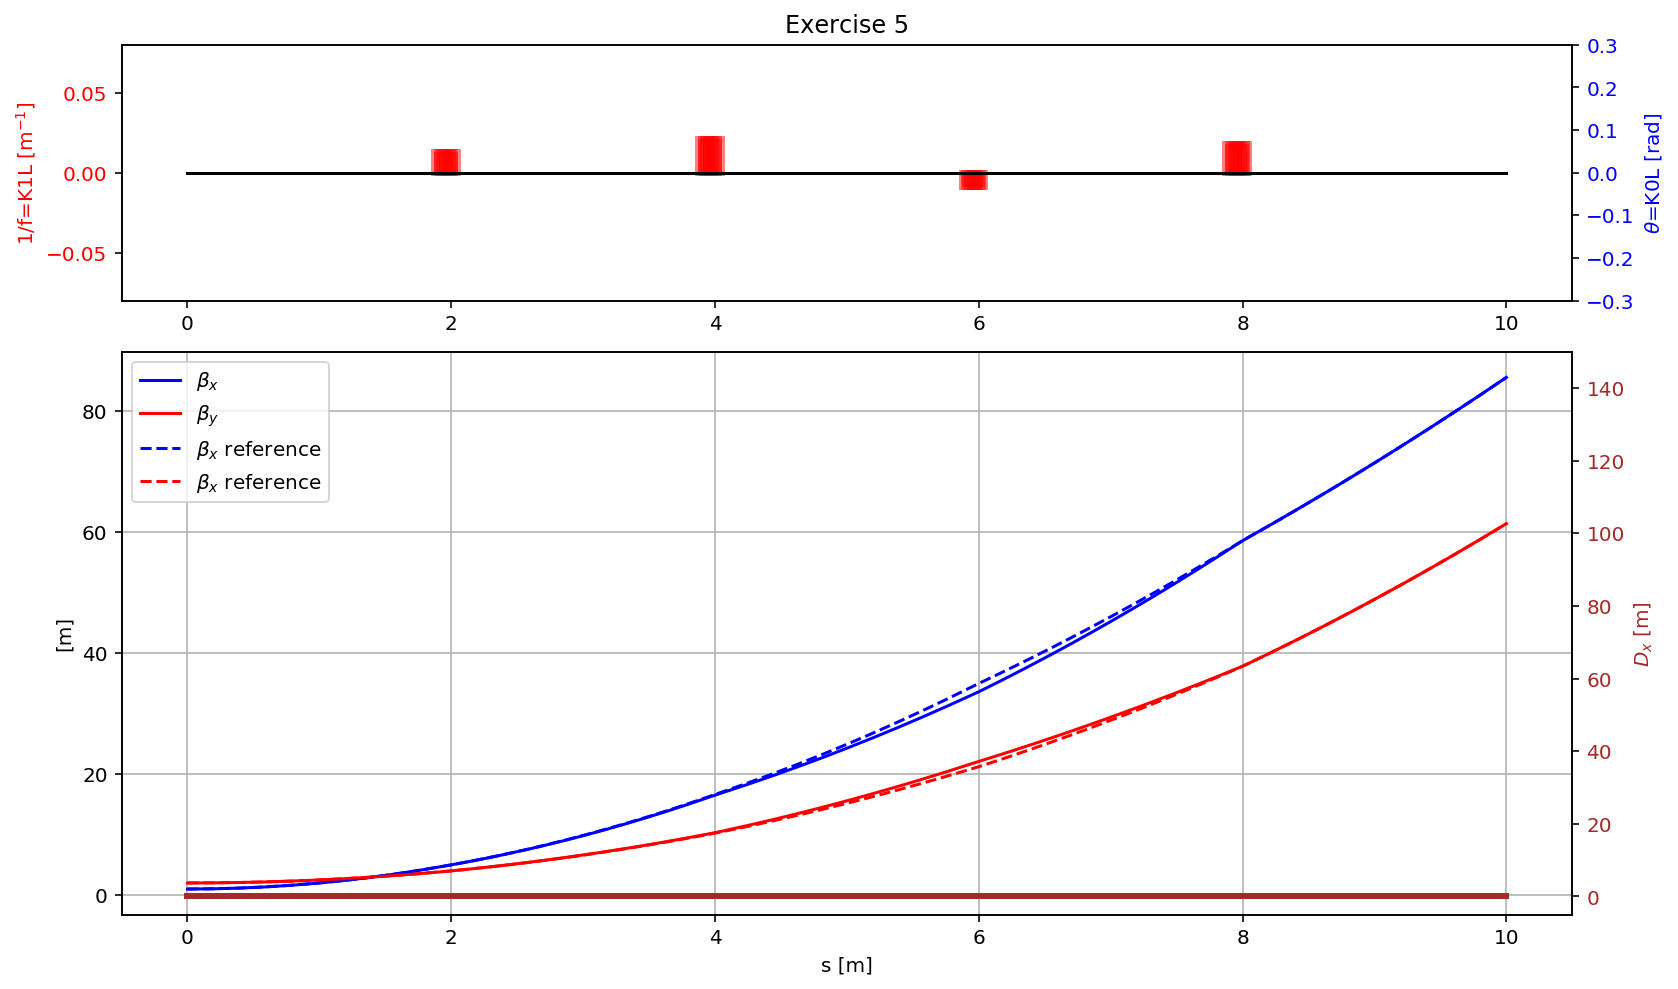

In [117]:
myTwiss=madx.table.twiss.dframe()
fig = plt.figure(figsize=(13,8))
# set up subplot grid
#gridspec.GridSpec(3,3)

ax1=plt.subplot2grid((3,3), (0,0), colspan=3, rowspan=1)
plt.plot(myTwiss['s'],0*myTwiss['s'],'k')


DF=myTwiss[(myTwiss['keyword']=='quadrupole')]
for i in range(len(DF)):
    aux=DF.iloc[i]
    plotLatticeSeries(plt.gca(),aux, height=aux.k1l, v_offset=aux.k1l/2, color='r')
    
DF=myTwiss[(myTwiss['keyword']=='multipole')]
for i in range(len(DF)):
    aux=DF.iloc[i]
    plotLatticeSeries(plt.gca(),aux, height=aux.k1l, v_offset=aux.k1l/2, color='r')

    
color = 'red'
ax1.set_ylabel('1/f=K1L [m$^{-1}$]', color=color)  # we already handled the x-label with ax1
ax1.tick_params(axis='y', labelcolor=color)
plt.ylim(-.08,.08)
plt.title('Exercise 5')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'blue'
ax2.set_ylabel('$\\theta$=K0L [rad]', color=color)  # we already handled the x-label with ax1
ax2.tick_params(axis='y', labelcolor=color)


#DF=myTwiss[(myTwiss['keyword']=='sbend')]
#for i in range(len(DF)):
#    aux=DF.iloc[i]
#    plotLatticeSeries(ax2,aux, height=aux.angle*1000, v_offset=aux.angle*1000/2, color='b')

DF=myTwiss[(myTwiss['keyword']=='multipole')]
for i in range(len(DF)):
    aux=DF.iloc[i]
    plotLatticeSeries(plt.gca(),aux, height=aux.k0l, v_offset=aux.k0l/2, color='b')

plt.ylim(-.3,.3)

# large subplot
plt.subplot2grid((3,3), (1,0), colspan=3, rowspan=2,sharex=ax1)

plt.plot(myTwiss['s'],myTwiss['betx'],'b', label='$\\beta_x$')
plt.plot(myTwiss['s'],myTwiss['bety'],'r', label='$\\beta_y$')
plt.plot(myTwissRef['s'],myTwissRef['betx'],'--b', label='$\\beta_x$ reference')
plt.plot(myTwissRef['s'],myTwissRef['bety'],'--r', label='$\\beta_x$ reference')

plt.legend(loc='best')
plt.ylabel('[m]')
plt.xlabel('s [m]')
plt.grid()

ax3 = plt.gca().twinx()   # instantiate a second axes that shares the same x-axis
plt.plot(myTwiss['s'],myTwiss['dx'],'brown', label='$D_x$', lw=3)
ax3.set_ylabel('$D_x$ [m]', color='brown')  # we already handled the x-label with ax1
ax3.tick_params(axis='y', labelcolor='brown')
plt.ylim(-5, 150)

### Matrix response of the kickers

In [119]:
madx.input(''' 
theta1=1e-6;
theta2=0e-6;

twiss,betx=1, bety=2;
''')
aux=madx.table.twiss.dframe();
m11= aux.iloc[-1].x/1e-6
m21= aux.iloc[-1].px/1e-6

madx.input(''' 
theta1=0e-6;
theta2=1e-6;
twiss,betx=1, bety=2;
''')
aux=madx.table.twiss.dframe();
m12= aux.iloc[-1].x/1e-6
m22= aux.iloc[-1].px/1e-6

enter Twiss module
 Step length   0.26552120471633550     
call:     6 Dx =   0.26552120E+00  Penalty function =  0.4452270612573117E+07
 Solve system with            4 con,           4 var
 Rank             4   Condition number    78.079992249733792     
 Step length   0.19070963085955661     
call:     7 Dx =   0.19070963E+00  Penalty function =  0.4199432505378290E+06
 Solve system with            4 con,           4 var
 Rank             4   Condition number    50.130685019445643     
 Step length   0.10834695023789062     
call:     8 Dx =   0.10834695E+00  Penalty function =  0.2462569842519452E+05
 Solve system with            4 con,           4 var
 Rank             4   Condition number    37.527384391185166     
 Step length   6.42779528886594925E-002
call:     9 Dx =   0.64277953E-01  Penalty function =  0.1006145846747750E+03
 Solve system with            4 con,           4 var
 Rank             4   Condition number    31.778345179793554     
 Step length   2.9751468490714715

In [120]:
M_response=np.array([[m11, m12], [m21, m22]])
M_response

array([[7.32494522, 3.54345184],
       [0.89940429, 0.97171865]])

In [121]:
mySolution=np.linalg.inv(M_response)@np.array([[1e-3],[0]])
mySolution

array([[ 0.00024721],
       [-0.00022881]])

In [122]:
madx.input(f''' 
theta1={mySolution[0,0]};
theta2={mySolution[1,0]};
twiss,betx=1, bety=2;
''')
aux=madx.table.twiss.dframe()
aux[['x','px']]

++++++ info: theta1 redefined
++++++ info: theta2 redefined
enter Twiss module

++++++ table: summ

            length             orbit5               alfa            gammatr 
                10                 -0                  0                  0 

                q1                dq1            betxmax              dxmax 
      0.2366919613                  0        85.59952509     0.001110834194 

             dxrms             xcomax             xcorms                 q2 
   0.0007661552457              0.001    0.0006924133078       0.2141472156 

               dq2            betymax              dymax              dyrms 
                 0        61.41336649                  0                  0 

            ycomax             ycorms             deltap            synch_1 
                 0                  0                  0                  0 

           synch_2            synch_3            synch_4            synch_5 
                 0                  0           

,x,px
#s,0.000000,0.000000e+00
drift_0[0],0.000000,0.000000e+00
drift_0[0],0.000000,0.000000e+00
drift_0[0],0.000000,0.000000e+00
drift_0[0],0.000000,0.000000e+00
drift_0[0],0.000000,0.000000e+00
drift_0[0],0.000000,0.000000e+00
drift_0[0],0.000000,0.000000e+00
drift_0[0],0.000000,0.000000e+00
drift_0[0],0.000000,0.000000e+00


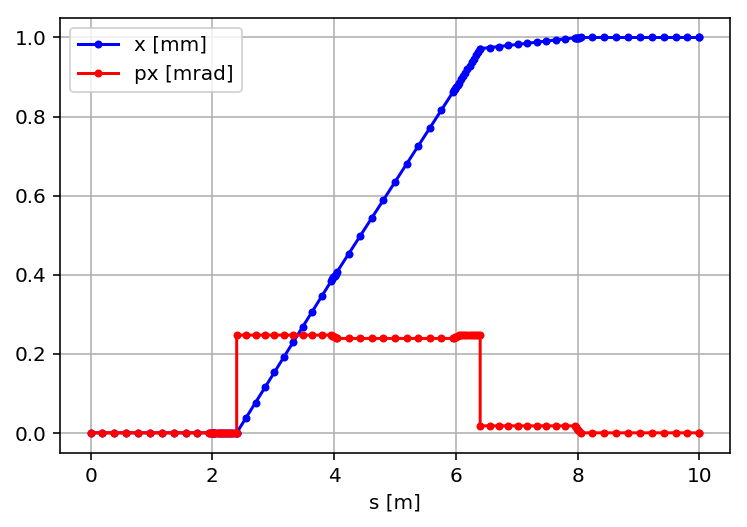

In [124]:
plt.plot(aux['s'],aux['x']*1000,'b.-',label='x [mm]')
plt.plot(aux['s'],aux['px']*1000,'r.-',label='px [mrad]')
plt.grid()
plt.xlabel('s [m]')
plt.legend(loc='best')